In [133]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam

In [134]:
df = pd.read_csv('nvda_options_data.csv')
df = df.dropna()

In [135]:
X = df[['strike', 'IV','Stock_Price', 'Time_to_Expire','Risk_Free_Rate']]
y = df[['PutPrice']]
X.head()

,strike,IV,Stock_Price,Time_to_Expire,Risk_Free_Rate
0,5.0,0.566315,117.889999,1.820671,0.0422
1,10.0,0.566315,117.889999,1.820671,0.0422
2,15.0,0.566315,117.889999,1.820671,0.0422
3,20.0,0.566315,117.889999,1.820671,0.0422
4,25.0,0.566315,117.889999,1.820671,0.0422


In [136]:
X.head()

,strike,IV,Stock_Price,Time_to_Expire,Risk_Free_Rate
0,5.0,0.566315,117.889999,1.820671,0.0422
1,10.0,0.566315,117.889999,1.820671,0.0422
2,15.0,0.566315,117.889999,1.820671,0.0422
3,20.0,0.566315,117.889999,1.820671,0.0422
4,25.0,0.566315,117.889999,1.820671,0.0422


In [137]:
print(f"X shape: {X.shape}, Y shape: {y.shape}")

X shape: (50, 5), Y shape: (50, 1)


In [138]:
X = StandardScaler().fit_transform(X)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

In [140]:
X_train, y_train = tf.convert_to_tensor(X_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test, y_test = tf.convert_to_tensor(X_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

In [141]:
# Hyperparams
n_units = X_train.shape[1]
n1_units = 400
layers = 4


In [142]:
model = Sequential()
model.add(Dense(n_units, input_dim=X_train.shape[1]))
model.add(LeakyReLU())
for _ in range(layers - 1):
    model.add(Dense(n1_units))
    model.add(LeakyReLU())

model.add(Dense(1, activation='relu'))

/Users/aadityatrivedee/tf_lib/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [143]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_24 (LeakyReLU)      │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 400)            │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_25 (LeakyReLU)      │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_26 (LeakyReLU)      │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_27 (LeakyReLU)      │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323,631 (1.23 MB)

 Trainable params: 323,631 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [144]:
model.compile(loss='mae', optimizer=Adam(learning_rate=0.001))

In [145]:
batch_size = 32
losses = model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=batch_size, epochs=30, verbose=1)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 46.0341 - val_loss: 61.2771
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 47.5572 - val_loss: 60.7713
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 47.1658 - val_loss: 60.0471
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 43.9392 - val_loss: 58.9328
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 44.2940 - val_loss: 57.2146
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 43.0434 - val_loss: 54.6109
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 41.8758 - val_loss: 50.8762
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 37.7716 - val_loss: 45.7587
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 35.5667 - val_loss: 38.8922
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 27.9982 - val_loss: 29.9896
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 24.7762 - val_loss: 18.8069
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 15.7

In [146]:
model.evaluate(X_test[:3], y_test[:3],batch_size=batch_size)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.7053


8.70527172088623

In [147]:
model.predict(pd.DataFrame(X_test).iloc[0:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[ 77.50868 ],
       [ 26.495623],
       [126.072754]], dtype=float32)

In [148]:
pd.DataFrame(y_test).iloc[0:3]

,0
0,61.310001
1,30.900000
2,120.559998


<Axes: >

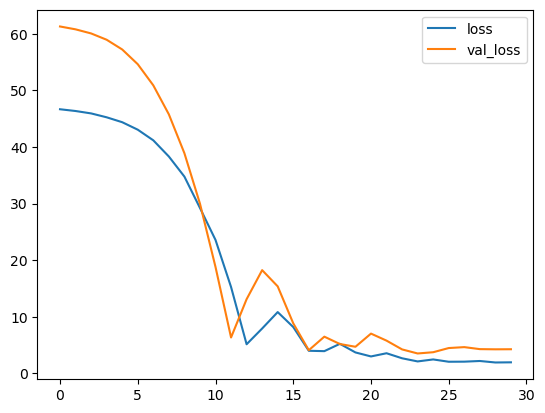

In [149]:
loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()

In [150]:
def error(x,y):
    error = np.sum(np.abs(model.predict(pd.DataFrame(x)) - pd.DataFrame(y)))*100/(np.sum(np.array(y)))
    return error

In [151]:
print('Mean Square Percentage Error in train:', error(X_train, y_train))
print('Mean Square Percentage Error in test:', error(X_test, y_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Square Percentage Error in train: 0    4.203948
dtype: float32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Mean Square Percentage Error in test: 0    6.925685
dtype: float32


/Users/aadityatrivedee/tf_lib/env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/aadityatrivedee/tf_lib/env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [152]:
def aggregate(data, size=1):
    return np.array([np.mean(data[i:i + size]) for i in range(0, len(data), size)])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


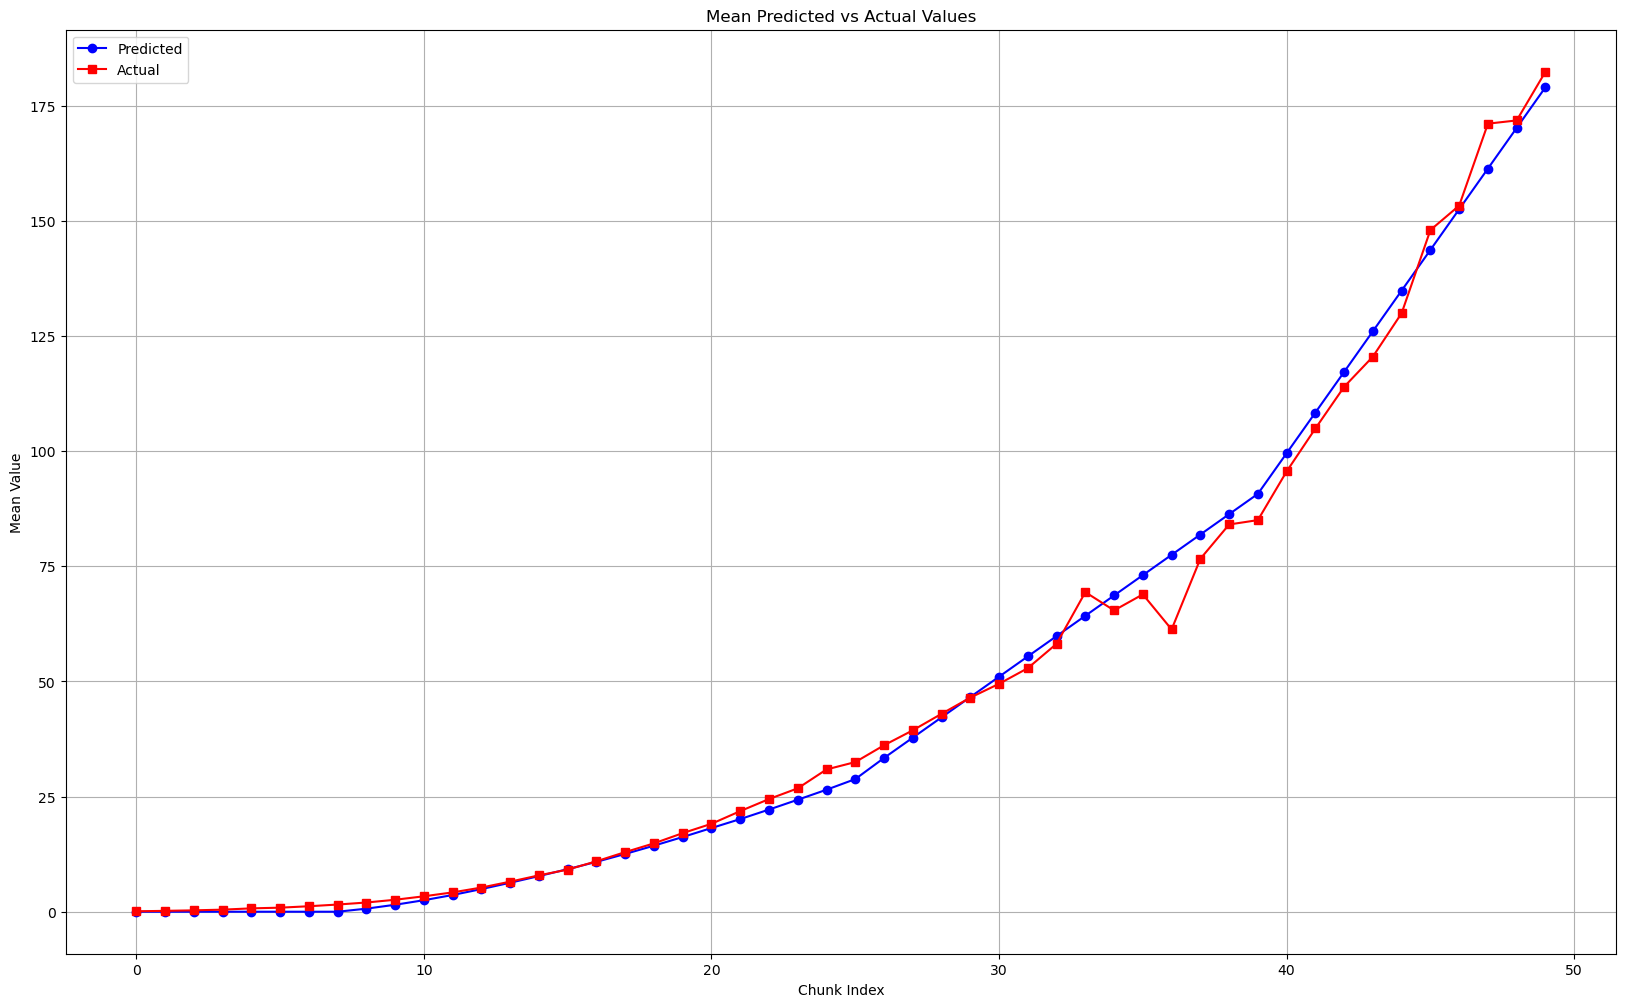

In [153]:
plt.figure(figsize=(20, 12))
X_plt=model.predict(pd.DataFrame(X))
plt.plot(aggregate(X_plt), label='Predicted', marker='o', linestyle='-', color='blue')
plt.plot(aggregate(pd.DataFrame(y)), label='Actual', marker='s', linestyle='-', color='red')
plt.title('Mean Predicted vs Actual Values')
plt.xlabel('Chunk Index')
plt.ylabel('Mean Value')
plt.grid()
plt.legend()
plt.show()

In [154]:
model.save('generalarch_put.h5')